In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Students performance

In [76]:
students_performance = pd.read_csv("./StudentsPerformance.csv")

In [77]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [78]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [79]:
students_performance.shape

(1000, 8)

In [80]:
students_performance.groupby("gender").aggregate({"writing score":"mean"})

,writing score
gender,
female,72.467181
male,63.311203


In [81]:
students_performance.iloc[[0, -1],0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
999,female,group D,some college


In [82]:
students_performance_with_names = students_performance.iloc[[0, -1],0:3]

In [83]:
students_performance_with_names.index = ["a", "b"]

In [84]:
students_performance_with_names

,gender,race/ethnicity,parental level of education
a,female,group B,bachelor's degree
b,female,group D,some college


In [85]:
students_performance_with_names.loc[["a", "b"], ["gender"]]

,gender
a,female
b,female


In [86]:
students_performance_with_names.columns

Index(['gender', 'race/ethnicity', 'parental level of education'], dtype='object')

## Titanic dataset

In [87]:
titanic= pd.read_csv("./titanic.csv")

In [88]:
titanic.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [89]:
students_performance.loc[students_performance["gender"] == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [90]:
writing_score = students_performance['writing score'].mean()

In [91]:
writing_score

68.054

In [92]:
students_performance[(students_performance["writing score"] > writing_score) & (students_performance["gender"] == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [93]:
students_performance[students_performance['lunch'] == 'free/reduced'].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [94]:
students_performance[students_performance['lunch'] == 'standard'].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [95]:
students_performance[students_performance['lunch'] == 'free/reduced'].std()

math score       15.159956
reading score    14.895339
writing score    15.433823
dtype: float64

In [96]:
students_performance[students_performance['lunch'] == 'standard'].std()

math score       13.653501
reading score    13.830602
writing score    14.339487
dtype: float64

In [97]:
[i for i in list(students_performance) if 'score' in i]

['math score', 'reading score', 'writing score']

In [98]:
students_performance.filter(like = 'score').head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [99]:
students_performance.sort_values(['gender', 'math score'], ascending = False) \
    .groupby('gender').head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


## Dota dataset

In [100]:
dota = pd.read_csv('.\dota_hero_stats.csv')

In [101]:
dota.groupby('legs').describe()

Unnamed: 0                                                         id  \
          count       mean        std   min   25%   50%   75%    max count   
legs                                                                         
0          11.0  46.000000  32.227318   9.0  20.0  38.0  76.0   92.0  11.0   
2          95.0  58.789474  34.307091   0.0  29.5  58.0  86.5  116.0  95.0   
4           7.0  61.714286  31.721256   2.0  53.0  61.0  84.0   95.0   7.0   
6           3.0  68.000000  46.679760  15.0  50.5  86.0  94.5  103.0   3.0   
8           1.0  59.000000        NaN  59.0  59.0  59.0  59.0   59.0   1.0   

                                                           
           mean        std   min   25%   50%   75%    max  
legs                                                       
0     47.727273  32.554849  10.0  21.5  40.0  78.0   94.0  
2     60.842105  34.994928   1.0  31.5  60.0  88.5  129.0  
4     63.571429  32.035694   3.0  55.0  63.0  86.0   97.0  
6     69.666667  47.247575  16.0  52.0  88.0  96.5  105.0  
8     61.000000        NaN  61.0  61.0  61.0  61.0   61.0

## Lupa Pupa dataset

In [102]:
lupa = pd.read_csv('./accountancy.csv')

In [103]:
lupa.groupby(['Executor','Type'])[['Salary']].mean()

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [104]:
dota.groupby(['attack_type', 'primary_attr']).describe()

Unnamed: 0                                           \
                              count       mean        std   min    25%   50%   
attack_type primary_attr                                                       
Melee       agi                19.0  61.315789  38.233279   0.0  34.50  65.0   
            int                 2.0  67.500000  20.506097  53.0  60.25  67.5   
            str                35.0  62.657143  34.265351   1.0  31.50  69.0   
Ranged      agi                18.0  46.111111  32.737618   5.0  15.25  44.5   
            int                40.0  55.225000  32.472069   2.0  28.75  50.5   
            str                 3.0  84.666667  25.774665  57.0  73.00  89.0   

                                          id             ...                 \
                            75%    max count       mean  ...     75%    max   
attack_type primary_attr                                 ...                  
Melee       agi           89.00  114.0  19.0  63.315789  ...   91.00  120.0   
            int           74.75   82.0   2.0  69.500000  ...   76.75   84.0   
            str           95.50  116.0  35.0  64.771429  ...   97.50  129.0   
Ranged      agi           67.75  111.0  18.0  47.777778  ...   69.75  113.0   
            int           78.75  115.0  40.0  57.275000  ...   80.75  121.0   
            str           98.50  108.0   3.0  86.666667  ...  100.50  110.0   

                          legs                                               
                         count      mean       std  min  25%  50%  75%  max  
attack_type primary_attr                                                     
Melee       agi           19.0  2.315789  1.796683  0.0  2.0  2.0  2.0  8.0  
            int            2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
            str           35.0  2.171429  0.890661  0.0  2.0  2.0  2.0  6.0  
Ranged      agi           18.0  1.444444  1.149026  0.0  0.0  2.0  2.0  4.0  
            int           40.0  2.250000  0.926809  0.0  2.0  2.0  2.0  6.0  
            str            3.0  1.333333  1.154701  0.0  1.0  2.0  2.0  2.0  

[6 rows x 24 columns]

## Chemicals dataset (sucrose, alanin, citrate, ...)

In [105]:
chem = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')

In [106]:
chem[chem['genus'] == 'Fucus'].describe()

,sucrose,alanin,citrate,glucose,oleic_acid
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.355112,3.566411,4.214878,2.814803,3.367647
std,2.110570,3.149943,2.691679,0.713559,3.050376
min,3.001472,0.346431,1.216767,2.272724,0.304573
25%,3.139171,2.028965,3.110515,2.410591,1.848888
50%,3.276870,3.711498,5.004262,2.548459,3.393203
75%,5.031933,5.176401,5.713934,3.085842,4.899184
max,6.786996,6.641303,6.423606,3.623225,6.405165


In [107]:
chem.groupby('group')['citrate'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
brown,6.0,4.098597,2.338577,1.071920,2.163641,5.128895,5.529506,6.423606
green,3.0,5.288311,1.987489,3.082826,4.462173,5.841520,6.391054,6.940588
red,1.0,5.573905,NaN,5.573905,5.573905,5.573905,5.573905,5.573905


<AxesSubplot:>

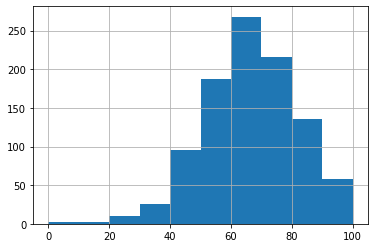

In [111]:
students_performance['math score'].hist()

<AxesSubplot:xlabel='math score', ylabel='reading score'>

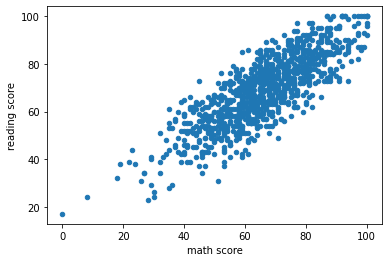

In [112]:
students_performance.plot.scatter(x = 'math score', y = 'reading score')

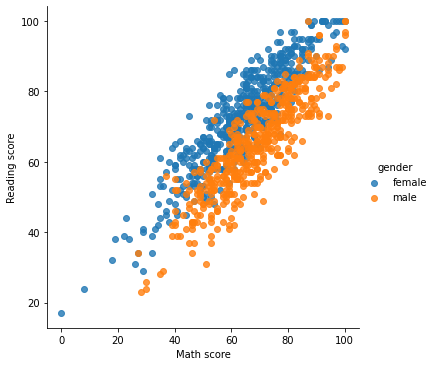

In [122]:
ax = sns.lmplot(x = 'math score', y = 'reading score', data = students_performance, hue = 'gender', fit_reg = False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

## Income dataset to test plot functions

In [125]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/income.csv")

In [126]:
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


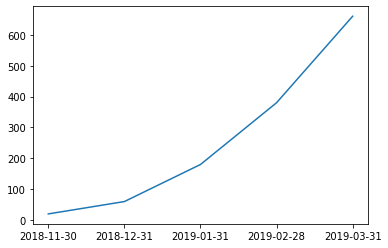

In [130]:
plt.plot(df.index, df.income)

<AxesSubplot:ylabel='income'>

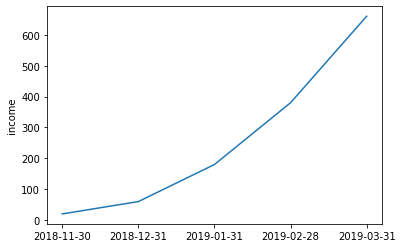

In [131]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

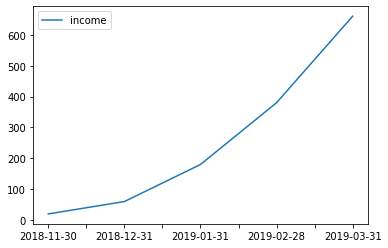

In [132]:
df.plot()

<AxesSubplot:>

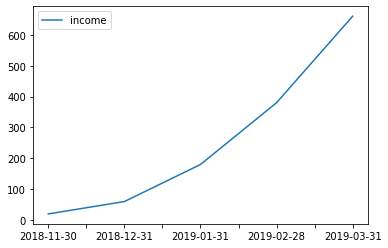

In [133]:
df.plot(kind='line')

<AxesSubplot:>

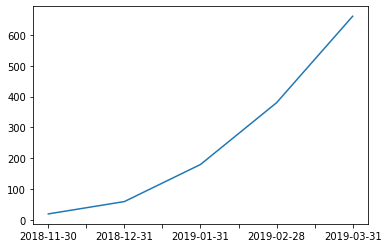

In [134]:
df['income'].plot()

<AxesSubplot:>

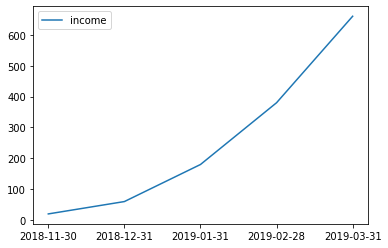

In [135]:
sns.lineplot(data=df)

<AxesSubplot:>

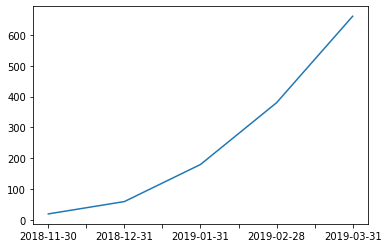

In [136]:
df.income.plot()

## Random dataset to solve a step on stepik

In [143]:
dd= pd.read_csv(".\dataset_209770_6.txt", sep=' ')

In [144]:
dd.head()

,x,y
0,209.050866,891.021024
1,1192.682752,1314.218814
2,792.221777,987.188762
3,201.883972,903.516726
4,799.327099,1000.892860


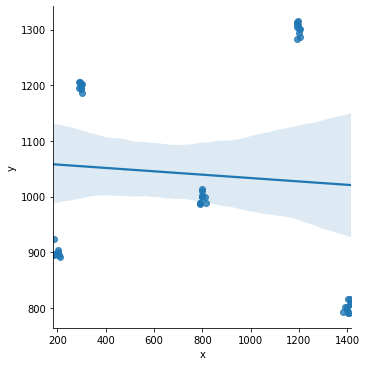

In [145]:
sns.lmplot(x = 'x', y = 'y', data = dd)

## Genom dataset

In [190]:
genom = pd.read_csv("genome_matrix.csv")

In [193]:
genom = genom.set_index('Unnamed: 0', drop = True)

In [194]:
genom.head()

,species0,species1,species2,species3,species4
Unnamed: 0,,,,,
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


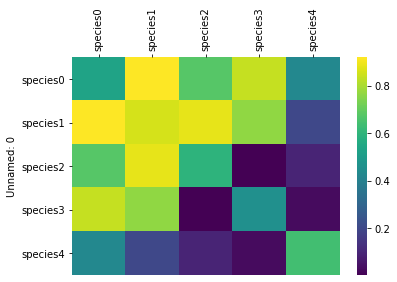

In [196]:
g = sns.heatmap(genom,cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

## Dota dataset, 2

In [198]:
dota2 = pd.read_csv(".\dota_2.csv")

In [202]:
dota2['roles_count'] = dota2['roles'].apply(lambda x: len(eval(x)))

In [203]:
dota2.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,roles_count
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


<AxesSubplot:>

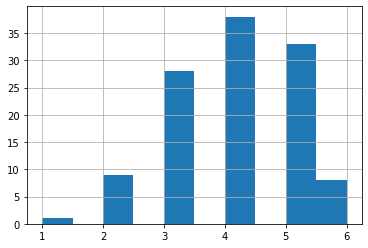

In [204]:
dota2['roles_count'].hist()

## Iris dataset

In [215]:
iris = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [216]:
iris = iris.drop(columns=['Unnamed: 0','species'])
iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


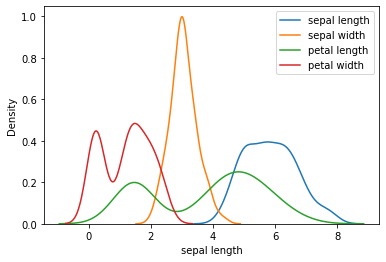

In [218]:
for column in iris:
    sns.kdeplot(data=iris, x=column, label = column)
plt.legend()

<AxesSubplot:xlabel='petal length'>

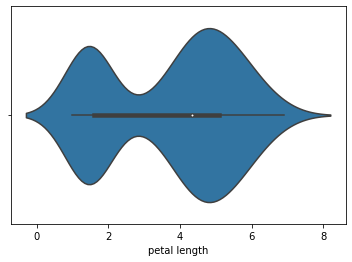

In [219]:
sns.violinplot(x=iris["petal length"])

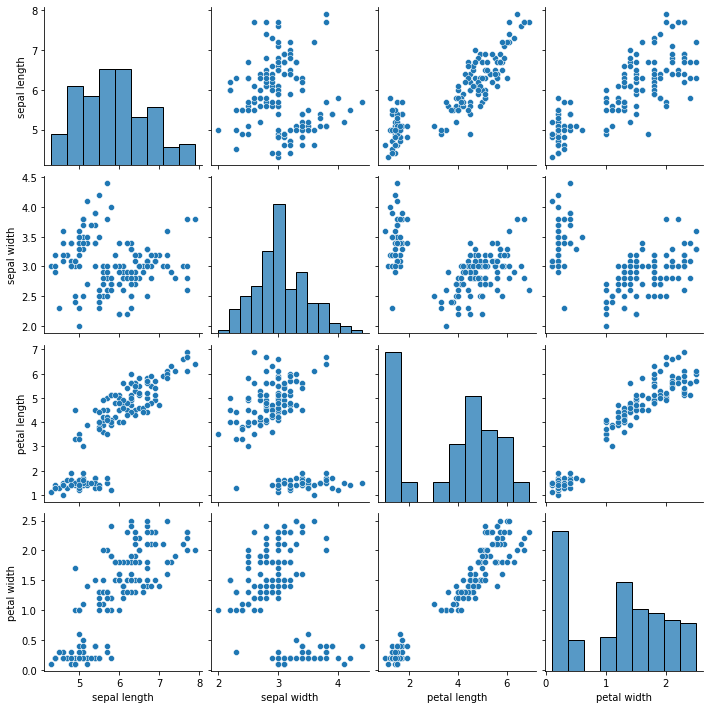

In [221]:
sns.pairplot(iris)

## Pandas Practice Exercises

In [247]:
data = pd.DataFrame({'type': ['A','A','B','B'], 'value': [10, 14, 12, 23]})

In [248]:
data.head()

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [257]:
subset1 = data[(data['type'] == 'A') | (data['value'] != 13)]

In [258]:
subset1.head()

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [294]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [301]:
my_stat.head()

,session_value,time,group,n_users
0,0.0,12,B,9.0
1,0.0,11,A,5.0
2,1.0,8,A,1.0
3,2.0,9,B,3.0
4,2.0,10,B,9.0


In [298]:
 my_stat['session_value'].fillna(0, inplace = True)

In [300]:
my_stat.loc[my_stat['n_users']<0, 'n_users'] = my_stat.loc[my_stat['n_users']>=0, 'n_users'].median()

In [307]:
mean_session_value_data = my_stat.groupby('group', as_index = False).agg({'session_value': 'mean'}).rename(columns={'session_value':'mean_session_value'})

In [308]:
mean_session_value_data.head()

,group,mean_session_value
0,A,0.8
1,B,0.8
